In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
df_brasileirao = pd.read_csv("brasileirao_serieA_finalCampeonato.csv")
df_brasileirao

,ano,posicao,time,UF,pontos,partidas_jogadas,vitorias,empates,derrotas,gols_pro,gols_contra,saldo_gols,cartao_amarelo,cartao_vermelho,aproveitamento,ultimas_jogadas
0,2013,1,Cruzeiro,MG,76,38,23,7,8,77,37,40,73,4,66,NaN
1,2013,2,Grêmio,RS,65,38,18,11,9,42,35,7,79,6,57,NaN
2,2013,3,Atlético,PR,64,38,18,10,10,65,49,16,92,5,56,NaN
3,2013,4,Botafogo,RJ,61,38,17,10,11,55,41,14,82,3,53,NaN
4,2013,5,Vitória,BA,59,38,16,11,11,59,53,6,67,1,51,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,2023,16,Bahia,BA,44,38,12,8,18,50,53,-3,96,8,38,DDV
216,2023,17,Santos,SP,43,38,11,10,17,39,64,-25,103,9,37,DDD
217,2023,18,Goiás,GO,38,38,9,11,18,36,53,-17,108,8,33,DDV
218,2023,19,Coritiba,PR,30,38,8,6,24,41,73,-32,68,6,26,EDD


In [118]:
df_brasileirao.shape #mostra linhas e colunas

(220, 16)

In [120]:
df_brasileirao.columns

Index(['ano', 'posicao', 'time', 'UF', 'pontos', 'partidas_jogadas',
       'vitorias', 'empates', 'derrotas', 'gols_pro', 'gols_contra',
       'saldo_gols', 'cartao_amarelo', 'cartao_vermelho', 'aproveitamento',
       'ultimas_jogadas'],
      dtype='object')

In [121]:
df_brasileirao.dtypes

ano                  int64
posicao              int64
time                object
UF                  object
pontos               int64
partidas_jogadas     int64
vitorias             int64
empates              int64
derrotas             int64
gols_pro             int64
gols_contra          int64
saldo_gols           int64
cartao_amarelo       int64
cartao_vermelho      int64
aproveitamento       int64
ultimas_jogadas     object
dtype: object

In [122]:
df_brasileirao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ano               220 non-null    int64 
 1   posicao           220 non-null    int64 
 2   time              220 non-null    object
 3   UF                220 non-null    object
 4   pontos            220 non-null    int64 
 5   partidas_jogadas  220 non-null    int64 
 6   vitorias          220 non-null    int64 
 7   empates           220 non-null    int64 
 8   derrotas          220 non-null    int64 
 9   gols_pro          220 non-null    int64 
 10  gols_contra       220 non-null    int64 
 11  saldo_gols        220 non-null    int64 
 12  cartao_amarelo    220 non-null    int64 
 13  cartao_vermelho   220 non-null    int64 
 14  aproveitamento    220 non-null    int64 
 15  ultimas_jogadas   120 non-null    object
dtypes: int64(13), object(3)
memory usage: 27.6+ KB


In [123]:
df_brasileirao.describe()

,ano,posicao,pontos,partidas_jogadas,vitorias,empates,derrotas,gols_pro,gols_contra,saldo_gols,cartao_amarelo,cartao_vermelho,aproveitamento
count,220.000000,220.000000,220.000000,220.0,220.000000,220.000000,220.00000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,2018.000000,10.500000,51.831818,38.0,13.890909,10.209091,13.90000,44.850000,44.877273,-0.027273,89.390909,5.472727,45.009091
std,3.169489,5.779431,12.795329,0.0,4.422536,2.521489,4.41138,11.149063,9.814649,17.044909,13.027611,2.775329,11.238385
min,2013.000000,1.000000,15.000000,38.0,1.000000,4.000000,3.00000,18.000000,22.000000,-57.000000,61.000000,0.000000,13.000000
25%,2015.000000,5.750000,44.000000,38.0,11.000000,8.000000,11.00000,37.750000,38.000000,-10.000000,81.000000,3.000000,38.000000
50%,2018.000000,10.500000,51.000000,38.0,14.000000,10.000000,14.00000,44.000000,44.000000,0.000000,89.000000,5.000000,44.000000
75%,2021.000000,15.250000,59.000000,38.0,17.000000,12.000000,17.00000,51.000000,51.000000,11.000000,98.000000,7.000000,51.000000
max,2023.000000,20.000000,90.000000,38.0,28.000000,17.000000,28.00000,86.000000,81.000000,49.000000,130.000000,14.000000,78.000000


In [18]:
#as maiores pontuações esses anos
max_pontos = df_brasileirao.groupby('pontos')[["time", "ano"]].max()
max_pontos = max_pontos.sort_index(ascending=False)
max_pontos

,time,ano
pontos,,
90,Flamengo,2019
84,Atlético,2021
81,Palmeiras,2022
80,Palmeiras,2018
76,Cruzeiro,2013
74,Santos,2019
73,Internacional,2022
72,Flamengo,2018
71,Santos,2021


In [35]:
campeoes_por_ano = df_brasileirao.loc[df_brasileirao.groupby('ano')['pontos'].idxmax()]

In [36]:
campeoes_por_ano = campeoes_por_ano[['ano', 'pontos', 'time']]
campeoes_por_ano

,ano,pontos,time
0,2013,76,Cruzeiro
20,2014,80,Cruzeiro
40,2015,81,Corinthians
60,2016,80,Palmeiras
80,2017,72,Corinthians
100,2018,80,Palmeiras
120,2019,90,Flamengo
140,2020,71,Flamengo
160,2021,84,Atlético
180,2022,81,Palmeiras


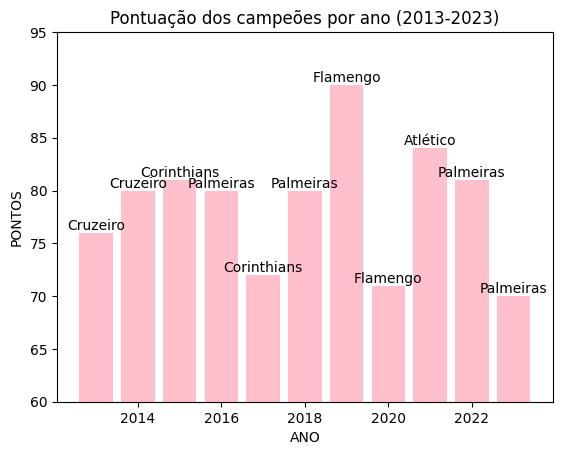

In [109]:
anos = campeoes_por_ano['ano']
pontos = campeoes_por_ano['pontos']

plt.bar(anos, pontos, color='pink')
plt.ylim(60, 95)
plt.xlabel('ANO')
plt.ylabel('PONTOS')
plt.title('Pontuação dos campeões por ano (2013-2023)')

for index, row in campeoes_por_ano.iterrows():
    plt.text(row['ano'], row['pontos'], row['time'], ha='center', va='bottom')

plt.show()